In [106]:
import json
import os
import PIL
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import shutil
import seaborn as sns
import random
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix


# Explore Dataset

karena dari datasetnya sendiri udah dipisah train, test, dan validation, maka disini hanya menggunakan json pada folder train untuk dilakukan explore, nanti setelah selesai explore, maka semua tahapan tadi akan di terapkan ke seluruh folder (train, validation, dan testing)

In [107]:
# Baca file JSON
with open("../data/raw/Deteksi Tulisan Aksara.v2-dataset_aksara_sasak.coco/train/_annotations.coco.json", 'r') as file:
    data = json.load(file)

print(data)
print(type(data))

{'info': {'year': '2025', 'version': '2', 'description': 'Exported from roboflow.com', 'contributor': '', 'url': 'https://public.roboflow.com/object-detection/undefined', 'date_created': '2025-11-16T01:53:02+00:00'}, 'licenses': [{'id': 1, 'url': 'https://creativecommons.org/licenses/by/4.0/', 'name': 'CC BY 4.0'}], 'categories': [{'id': 0, 'name': 'Aksara', 'supercategory': 'none'}, {'id': 1, 'name': 'BA', 'supercategory': 'Aksara'}, {'id': 2, 'name': 'CA', 'supercategory': 'Aksara'}, {'id': 3, 'name': 'DA', 'supercategory': 'Aksara'}, {'id': 4, 'name': 'GA', 'supercategory': 'Aksara'}, {'id': 5, 'name': 'HA', 'supercategory': 'Aksara'}, {'id': 6, 'name': 'JA', 'supercategory': 'Aksara'}, {'id': 7, 'name': 'KA', 'supercategory': 'Aksara'}, {'id': 8, 'name': 'LA', 'supercategory': 'Aksara'}, {'id': 9, 'name': 'MA', 'supercategory': 'Aksara'}, {'id': 10, 'name': 'NA', 'supercategory': 'Aksara'}, {'id': 11, 'name': 'NGA', 'supercategory': 'Aksara'}, {'id': 12, 'name': 'NYA', 'supercatego

In [108]:
# struktur data
print("Struktur data:")
for key in data.keys():
    print(f"- {key}: {len(data[key])} items")

Struktur data:
- info: 6 items
- licenses: 1 items
- categories: 19 items
- images: 2580 items
- annotations: 2568 items


### Struktur Images

In [112]:
images_df = pd.DataFrame(data['images'])
print(" Data Images:")
images_df.head()

 Data Images:


,id,license,file_name,height,width,date_captured,extra
0,0,1,31_jpeg.rf.35abde6151468f42481920569c2a952f.jpg,640,640,2025-11-16T01:53:02+00:00,{'name': '31.jpeg'}
1,1,1,14_jpeg.rf.daad6ddc0fdf87cf507be5df4665cad8.jpg,640,640,2025-11-16T01:53:02+00:00,{'name': '14.jpeg'}
2,2,1,63_jpeg.rf.e3d5f014b4f85d9521b51cdb6ebe758d.jpg,640,640,2025-11-16T01:53:02+00:00,{'name': '63.jpeg'}
3,3,1,2_jpeg.rf.5eb3011bc1146463908b08ac0b4dda79.jpg,640,640,2025-11-16T01:53:02+00:00,{'name': '2.jpeg'}
4,4,1,3_jpeg.rf.2ed1a96687d4c8f0b160bc36d929ba49.jpg,640,640,2025-11-16T01:53:02+00:00,{'name': '3.jpeg'}


In [118]:
images_df['license'].unique()

array([1])

In [119]:
images_df['id'].unique()

array([   0,    1,    2, ..., 2577, 2578, 2579], shape=(2580,))

In [120]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             2580 non-null   int64 
 1   license        2580 non-null   int64 
 2   file_name      2580 non-null   object
 3   height         2580 non-null   int64 
 4   width          2580 non-null   int64 
 5   date_captured  2580 non-null   object
 6   extra          2580 non-null   object
dtypes: int64(4), object(3)
memory usage: 141.2+ KB


### Struktur Annotations

In [125]:
annotation_df = pd.DataFrame(data['annotations'])
print("Data Annotations:")
annotation_df.head()

Data Annotations:


,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,1,0,12,"[0, 0, 640, 640]",409600.0,[],0
1,2,1,11,"[0, 0, 640, 640]",409600.0,[],0
2,3,2,7,"[0, 0, 640, 640]",409600.0,[],0
3,4,3,4,"[0, 0, 640, 640]",409600.0,[],0
4,5,4,9,"[0, 0, 640, 640]",409600.0,[],0


In [126]:
annotation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2568 entries, 0 to 2567
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2568 non-null   int64  
 1   image_id      2568 non-null   int64  
 2   category_id   2568 non-null   int64  
 3   bbox          2568 non-null   object 
 4   area          2568 non-null   float64
 5   segmentation  2568 non-null   object 
 6   iscrowd       2568 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 140.6+ KB


In [127]:
category1_df = annotation_df[annotation_df['category_id'] == 1]
category1_df

,id,image_id,category_id,bbox,area,segmentation,iscrowd
23,24,23,1,"[0, 0, 640, 640]",409600.0,[],0
64,65,64,1,"[0, 0, 640, 640]",409600.0,[],0
75,76,75,1,"[0, 0, 640, 640]",409600.0,[],0
83,84,83,1,"[0, 0, 640, 640]",409600.0,[],0
118,119,118,1,"[0, 0, 640, 640]",409600.0,[],0
...,...,...,...,...,...,...,...
2277,2278,2288,1,"[0, 0, 640, 640]",409600.0,[],0
2307,2308,2318,1,"[6, 0, 630.5, 637]",401628.5,[],0
2427,2428,2438,1,"[0, 3, 637, 633.5]",403539.5,[],0
2472,2473,2483,1,"[0, 0, 640, 640]",409600.0,[],0


### Struktur Categories

In [128]:
categories_df = pd.DataFrame(data['categories'])
print("Data Categories:")
categories_df.head()

Data Categories:


,id,name,supercategory
0,0,Aksara,none
1,1,BA,Aksara
2,2,CA,Aksara
3,3,DA,Aksara
4,4,GA,Aksara


In [129]:
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             19 non-null     int64 
 1   name           19 non-null     object
 2   supercategory  19 non-null     object
dtypes: int64(1), object(2)
memory usage: 588.0+ bytes


In [130]:
categories_df['name'].unique()

array(['Aksara', 'BA', 'CA', 'DA', 'GA', 'HA', 'JA', 'KA', 'LA', 'MA',
       'NA', 'NGA', 'NYA', 'PA', 'RA', 'SA', 'TA', 'WA', 'YA'],
      dtype=object)

In [131]:
categories_df['supercategory'].unique()

array(['none', 'Aksara'], dtype=object)

### Merge DataFrame

In [ ]:
# Merge annotations dengan categories
annotations_with_names = pd.merge(
    annotation_df,
    categories_df,
    left_on='category_id',
    right_on='id',
    suffixes=('_ann', '_cat')
)

annotations_with_names.head()

Annotations dengan Nama Kategori:


,id_ann,image_id,category_id,bbox,area,segmentation,iscrowd,id_cat,name,supercategory
0,1,0,12,"[0, 0, 640, 640]",409600.0,[],0,12,NYA,Aksara
1,2,1,11,"[0, 0, 640, 640]",409600.0,[],0,11,NGA,Aksara
2,3,2,7,"[0, 0, 640, 640]",409600.0,[],0,7,KA,Aksara
3,4,3,4,"[0, 0, 640, 640]",409600.0,[],0,4,GA,Aksara
4,5,4,9,"[0, 0, 640, 640]",409600.0,[],0,9,MA,Aksara


In [133]:
# Merge annotations_with_names dengan images_df
dataset_with_images = pd.merge(
    images_df,
    annotations_with_names,
    left_on='id',
    right_on='image_id'
)

dataset_with_images.head()

,id,license,file_name,height,width,date_captured,extra,id_ann,image_id,category_id,bbox,area,segmentation,iscrowd,id_cat,name,supercategory
0,0,1,31_jpeg.rf.35abde6151468f42481920569c2a952f.jpg,640,640,2025-11-16T01:53:02+00:00,{'name': '31.jpeg'},1,0,12,"[0, 0, 640, 640]",409600.0,[],0,12,NYA,Aksara
1,1,1,14_jpeg.rf.daad6ddc0fdf87cf507be5df4665cad8.jpg,640,640,2025-11-16T01:53:02+00:00,{'name': '14.jpeg'},2,1,11,"[0, 0, 640, 640]",409600.0,[],0,11,NGA,Aksara
2,2,1,63_jpeg.rf.e3d5f014b4f85d9521b51cdb6ebe758d.jpg,640,640,2025-11-16T01:53:02+00:00,{'name': '63.jpeg'},3,2,7,"[0, 0, 640, 640]",409600.0,[],0,7,KA,Aksara
3,3,1,2_jpeg.rf.5eb3011bc1146463908b08ac0b4dda79.jpg,640,640,2025-11-16T01:53:02+00:00,{'name': '2.jpeg'},4,3,4,"[0, 0, 640, 640]",409600.0,[],0,4,GA,Aksara
4,4,1,3_jpeg.rf.2ed1a96687d4c8f0b160bc36d929ba49.jpg,640,640,2025-11-16T01:53:02+00:00,{'name': '3.jpeg'},5,4,9,"[0, 0, 640, 640]",409600.0,[],0,9,MA,Aksara


In [18]:
dataset_with_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2568 entries, 0 to 2567
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2568 non-null   int64  
 1   license        2568 non-null   int64  
 2   file_name      2568 non-null   object 
 3   height         2568 non-null   int64  
 4   width          2568 non-null   int64  
 5   date_captured  2568 non-null   object 
 6   extra          2568 non-null   object 
 7   id_ann         2568 non-null   int64  
 8   image_id       2568 non-null   int64  
 9   category_id    2568 non-null   int64  
 10  bbox           2568 non-null   object 
 11  area           2568 non-null   float64
 12  segmentation   2568 non-null   object 
 13  iscrowd        2568 non-null   int64  
 14  id_cat         2568 non-null   int64  
 15  name           2568 non-null   object 
 16  supercategory  2568 non-null   object 
dtypes: float64(1), int64(9), object(7)
memory usage: 341

In [134]:
# take important column only
classification_columns = [
    'file_name',      
    'name'            
]

classification_df = dataset_with_images[classification_columns]
classification_df.head()

,file_name,name
0,31_jpeg.rf.35abde6151468f42481920569c2a952f.jpg,NYA
1,14_jpeg.rf.daad6ddc0fdf87cf507be5df4665cad8.jpg,NGA
2,63_jpeg.rf.e3d5f014b4f85d9521b51cdb6ebe758d.jpg,KA
3,2_jpeg.rf.5eb3011bc1146463908b08ac0b4dda79.jpg,GA
4,3_jpeg.rf.2ed1a96687d4c8f0b160bc36d929ba49.jpg,MA


### Checking Dataset Balance

In [135]:
# Hitung jumlah tiap kategori
category_counts = classification_df['name'].value_counts()

print("DISTRIBUSI KATEGORI:")
print("=" * 30)
for category, count in category_counts.items():
    print(f"{category}: {count} gambar")

print("=" * 30)
print(f"TOTAL: {len(classification_df)} gambar")
print(f"JUMLAH KELAS: {len(category_counts)}")
print(f"RATA-RATA: {len(classification_df) // len(category_counts)} per kelas")

# Cek apakah dataset seimbang
max_count = category_counts.max()
min_count = category_counts.min()
balance_ratio = min_count / max_count

print(f"\nIMBALANCE RATIO: {balance_ratio:.2f}")

if balance_ratio > 0.7:
    print("Dataset SEIMBANG")
elif balance_ratio > 0.4:
    print("Dataset AGAK IMBALANCE")
else:
    print("Dataset SANGAT IMBALANCE")

DISTRIBUSI KATEGORI:
MA: 171 gambar
NYA: 159 gambar
JA: 159 gambar
GA: 153 gambar
TA: 150 gambar
LA: 144 gambar
WA: 144 gambar
RA: 141 gambar
HA: 141 gambar
NGA: 138 gambar
SA: 138 gambar
PA: 138 gambar
KA: 135 gambar
YA: 135 gambar
CA: 135 gambar
NA: 132 gambar
BA: 129 gambar
DA: 126 gambar
TOTAL: 2568 gambar
JUMLAH KELAS: 18
RATA-RATA: 142 per kelas

IMBALANCE RATIO: 0.74
Dataset SEIMBANG


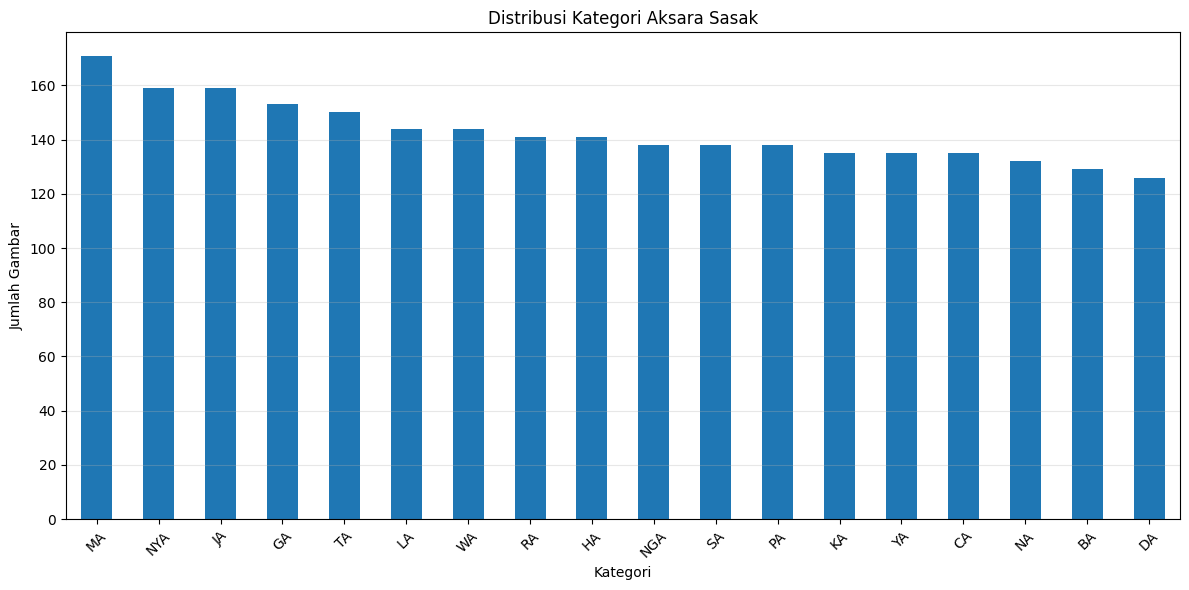

In [136]:
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Distribusi Kategori Aksara Sasak')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Resize Image

Karena ukuran awal image 640x640 maka dilakukan resize menjadi 224x224, selain menyesuaikan dengan ukuran CNN pada umumnya, resize ini sendiri berguna untuk meringankan proses pelatihan model, karena dengan ukuran 224x224 seharusnya sudah cukup jika hanya digunakan untuk mendeteksi aksara, dengan kondisi dimana tiap image sudah sangat bagus

Original size: 640x640


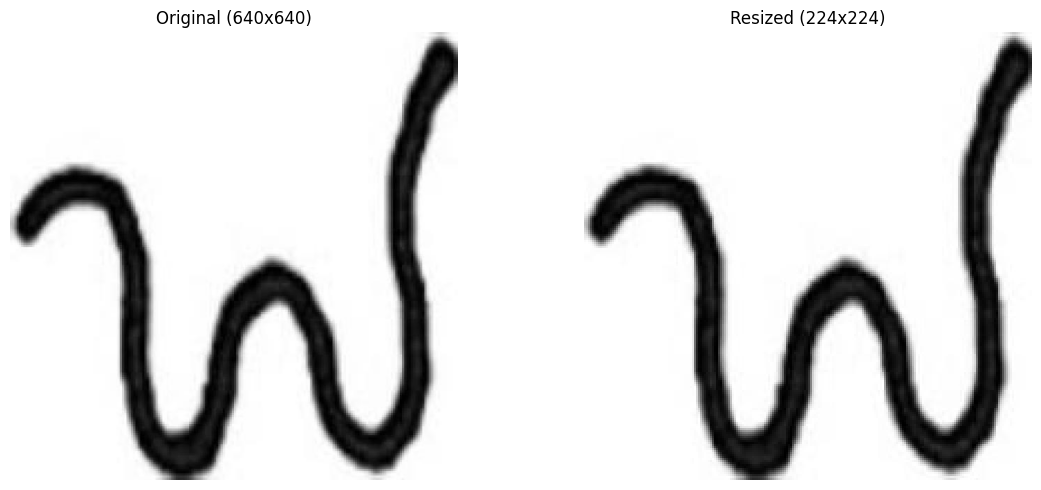

In [137]:


def test_single_image():
    # Load image
    img = cv2.imread("../data/raw/Deteksi Tulisan Aksara.v2-dataset_aksara_sasak.coco/test/1_jpeg.rf.5aa24978c888a6705bcfa443974c5725.jpg")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    print(f"Original size: {img.shape[1]}x{img.shape[0]}")
    resized = cv2.resize(img_rgb, (224, 224))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Original image
    ax1.imshow(img_rgb)
    ax1.set_title(f'Original ({img.shape[1]}x{img.shape[0]})')
    ax1.axis('off')
    
    # Resized image  
    ax2.imshow(resized)
    ax2.set_title('Resized (224x224)')
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()
test_single_image()

### Preprocessing Dataset


terdapat beberapa jenis dataset yang tersedia pada folder **raw**, jadi hanya mengambil dataset yang paling bagus di antara semua data tersebut, berhubung tiap folder berisi data yang sama

In [138]:


def process_to_folders(json_path, images_source_dir, output_dir, dataset_type, target_size=(224, 224)):
    # 1. Load JSON
    with open(json_path, 'r') as f:
        coco_data = json.load(f)
    
    # 2. Convert ke DataFrame
    images_df = pd.DataFrame(coco_data['images'])
    annotations_df = pd.DataFrame(coco_data['annotations'])
    categories_df = pd.DataFrame(coco_data['categories'])
    
    # 3. Merge data
    annotations_with_cat = pd.merge(annotations_df, categories_df, 
                                   left_on='category_id', right_on='id')
    full_data = pd.merge(images_df, annotations_with_cat, 
                        left_on='id', right_on='image_id')
  
    simple_df = full_data[['file_name', 'name']]
    dataset_output_dir = os.path.join(output_dir, dataset_type)
    os.makedirs(dataset_output_dir, exist_ok=True)
    
    print(f"Memproses {dataset_type} dataset...")
    for category in simple_df['name'].unique():
        category_dir = os.path.join(dataset_output_dir, category)
        os.makedirs(category_dir, exist_ok=True)
    
    copied_count = 0
    resize_failed = 0
    
    for idx, row in simple_df.iterrows():
        src_path = os.path.join(images_source_dir, row['file_name'])
        dst_dir = os.path.join(dataset_output_dir, row['name'])
        dst_path = os.path.join(dst_dir, row['file_name'])
        
        if os.path.exists(src_path):
            try:
                # Baca dan resize image
                img = cv2.imread(src_path)
                
                # Resize ke target size
                resized_img = cv2.resize(img, target_size)
                
                # Simpan image yang sudah diresize
                cv2.imwrite(dst_path, resized_img)
                copied_count += 1
                
            except Exception as e:
                print(f"Gagal resize {row['file_name']}: {e}")
                resize_failed += 1
                # Fallback: copy original jika resize gagal
                shutil.copy2(src_path, dst_path)
    
    print(f"{dataset_type.upper()} selesai!")
    print(f"   - Total data: {len(simple_df)}")
    print(f"   - Berhasil resize & copy: {copied_count} gambar")
    print(f"   - Gagal resize: {resize_failed} gambar")
    print(f"   - Ukuran target: {target_size[0]}x{target_size[1]}")
    print(f"   - Folder: {dataset_output_dir}")
    
    return simple_df

In [139]:
def analyze_dataset(df, dataset_name):
    counts = df['name'].value_counts()
    
    print(f"\n ANALISIS {dataset_name.upper()}:")
    print("=" * 40)
    for category, count in counts.items():
        print(f"   {category}: {count} gambar")
    
    print(f"   TOTAL: {len(df)} gambar")
    print(f"   KELAS: {len(counts)}")

In [140]:
# Define paths
OUTPUT_DIR =  "../data/preprocessing"

# Process semua dataset
train_df = process_to_folders(
    json_path="../data/raw/Deteksi Tulisan Aksara.v2-dataset_aksara_sasak.coco/train/_annotations.coco.json",
    images_source_dir="../data/raw/Deteksi Tulisan Aksara.v2-dataset_aksara_sasak.coco/train",
    output_dir=OUTPUT_DIR,
    dataset_type="train"
)

val_df = process_to_folders(
    json_path="../data/raw/Deteksi Tulisan Aksara.v2-dataset_aksara_sasak.coco/valid/_annotations.coco.json", 
    images_source_dir="../data/raw/Deteksi Tulisan Aksara.v2-dataset_aksara_sasak.coco/valid",
    output_dir=OUTPUT_DIR,
    dataset_type="valid"
)

test_df = process_to_folders(
    json_path="../data/raw/Deteksi Tulisan Aksara.v2-dataset_aksara_sasak.coco/test/_annotations.coco.json",
    images_source_dir="../data/raw/Deteksi Tulisan Aksara.v2-dataset_aksara_sasak.coco/test", 
    output_dir=OUTPUT_DIR,
    dataset_type="test"
)

Memproses train dataset...
TRAIN selesai!
   - Total data: 2568
   - Berhasil resize & copy: 2568 gambar
   - Gagal resize: 0 gambar
   - Ukuran target: 224x224
   - Folder: ../data/preprocessing\train
Memproses valid dataset...
VALID selesai!
   - Total data: 243
   - Berhasil resize & copy: 243 gambar
   - Gagal resize: 0 gambar
   - Ukuran target: 224x224
   - Folder: ../data/preprocessing\valid
Memproses test dataset...
TEST selesai!
   - Total data: 119
   - Berhasil resize & copy: 119 gambar
   - Gagal resize: 0 gambar
   - Ukuran target: 224x224
   - Folder: ../data/preprocessing\test


### Augmentasi Data

dari dataset yang disediakan, telah dilakukan augmentasi oleh sang pemilik data, sehingga disini tidak terlalu banyak augmentasi data yang dilakukan. adapun tahapan augmentasi dilakukan di folder train sebagai berikut:
- Outputs per training example: 3
- Flip: Horizontal
- 90° Rotate: Clockwise, Counter-Clockwise
- Crop: 0% Minimum Zoom, 20% Maximum Zoom
- Rotation: Between -15° and +15°
- Grayscale: Apply to 9% of images
- Blur: Up to 2.5px
- Noise: Up to 0.1% of pixels

In [141]:
# Path sesuaikan dengan folder hasil process_to_folders
TRAIN_DIR = "../data/preprocessing/train"
VAL_DIR = "../data/preprocessing/valid"
TEST_DIR = "../data/preprocessing/test"

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

print(f"Train samples: {train_generator.samples}")
print(f"Val samples: {val_generator.samples}")
print(f"Classes: {train_generator.class_indices}")

Found 2568 images belonging to 18 classes.
Found 243 images belonging to 18 classes.
Train samples: 2568
Val samples: 243
Classes: {'BA': 0, 'CA': 1, 'DA': 2, 'GA': 3, 'HA': 4, 'JA': 5, 'KA': 6, 'LA': 7, 'MA': 8, 'NA': 9, 'NGA': 10, 'NYA': 11, 'PA': 12, 'RA': 13, 'SA': 14, 'TA': 15, 'WA': 16, 'YA': 17}


### BUILD MODEL

In [142]:
NUM_CLASSES = len(train_generator.class_indices)

##### architecture 1

In [143]:
model = models.Sequential([
    # Block 1
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Block 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Block 4
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Classifier
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])


c:\Users\hifri\Kuliah\Github\Latihan Model\CNN\Aksara_Sasak\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [144]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [145]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 109, 109, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 18)             │         9,234 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,707,090 (37.03 MB)

 Trainable params: 9,707,090 (37.03 MB)

 Non-trainable params: 0 (0.00 B)

In [146]:
# Calculate proper steps
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size

print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")

history = model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=steps_per_epoch,     
    validation_steps=validation_steps,    
    epochs=20,
    verbose=2
)

Steps per epoch: 80
Validation steps: 7
Epoch 1/20
80/80 - 73s - 907ms/step - accuracy: 0.0580 - loss: 2.9258 - val_accuracy: 0.0312 - val_loss: 2.8921
Epoch 2/20


c:\Users\hifri\Kuliah\Github\Latihan Model\CNN\Aksara_Sasak\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


80/80 - 2s - 22ms/step - accuracy: 0.0625 - loss: 2.8911 - val_accuracy: 0.0312 - val_loss: 2.8921
Epoch 3/20
80/80 - 59s - 743ms/step - accuracy: 0.0662 - loss: 2.8885 - val_accuracy: 0.1384 - val_loss: 2.8581
Epoch 4/20
80/80 - 2s - 22ms/step - accuracy: 0.0938 - loss: 2.8502 - val_accuracy: 0.1116 - val_loss: 2.8633
Epoch 5/20
80/80 - 56s - 694ms/step - accuracy: 0.1479 - loss: 2.7477 - val_accuracy: 0.4777 - val_loss: 1.8564
Epoch 6/20
80/80 - 2s - 22ms/step - accuracy: 0.2188 - loss: 2.2787 - val_accuracy: 0.4866 - val_loss: 1.8572
Epoch 7/20
80/80 - 57s - 717ms/step - accuracy: 0.3044 - loss: 2.2742 - val_accuracy: 0.6027 - val_loss: 1.3940
Epoch 8/20
80/80 - 2s - 23ms/step - accuracy: 0.1562 - loss: 2.8703 - val_accuracy: 0.6384 - val_loss: 1.4146
Epoch 9/20
80/80 - 55s - 688ms/step - accuracy: 0.4140 - loss: 1.8963 - val_accuracy: 0.6920 - val_loss: 1.1070
Epoch 10/20
80/80 - 2s - 25ms/step - accuracy: 0.3438 - loss: 1.7122 - val_accuracy: 0.7054 - val_loss: 1.0936
Epoch 11/20


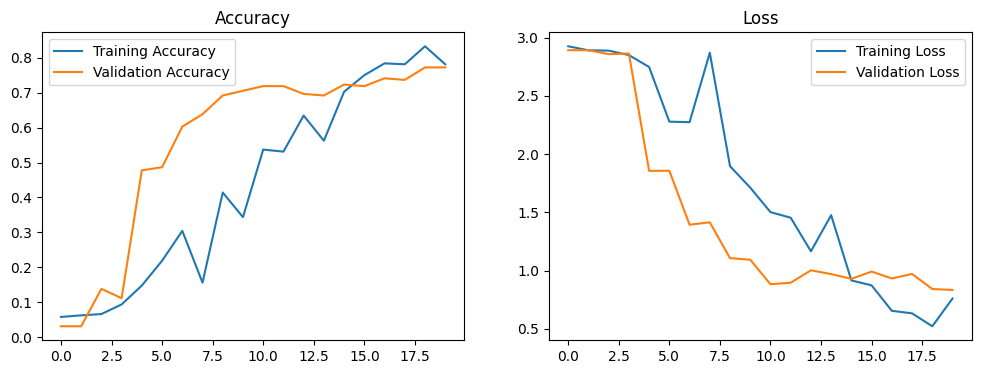

Final Training Accuracy: 0.7812
Final Validation Accuracy: 0.7723


In [147]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

##### architecture 2

In [148]:
model2 = models.Sequential([
    # Block 1 - Smaller
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    # Block 2  
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Block 3 - Even smaller
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    
    # Classifier - Much smaller
    layers.Dense(128, activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Classifier
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model2.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model2.summary()

c:\Users\hifri\Kuliah\Github\Latihan Model\CNN\Aksara_Sasak\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 26, 26, 128)    │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 512)            │    11,076,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 18)             │         9,234 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,195,090 (42.71 MB)

 Trainable params: 11,195,090 (42.71 MB)

 Non-trainable params: 0 (0.00 B)

In [149]:

history2 = model2.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    verbose=2
)

Epoch 1/20
81/81 - 39s - 487ms/step - accuracy: 0.0561 - loss: 3.1180 - val_accuracy: 0.0288 - val_loss: 2.8930
Epoch 2/20
81/81 - 39s - 480ms/step - accuracy: 0.0643 - loss: 2.9004 - val_accuracy: 0.0288 - val_loss: 2.8925
Epoch 3/20
81/81 - 41s - 504ms/step - accuracy: 0.0931 - loss: 2.8500 - val_accuracy: 0.2922 - val_loss: 2.4424
Epoch 4/20
81/81 - 41s - 511ms/step - accuracy: 0.2796 - loss: 2.3396 - val_accuracy: 0.5638 - val_loss: 1.6379
Epoch 5/20
81/81 - 42s - 518ms/step - accuracy: 0.4030 - loss: 1.9174 - val_accuracy: 0.6214 - val_loss: 1.4567
Epoch 6/20
81/81 - 37s - 460ms/step - accuracy: 0.5179 - loss: 1.5724 - val_accuracy: 0.7037 - val_loss: 1.0992
Epoch 7/20
81/81 - 40s - 492ms/step - accuracy: 0.6192 - loss: 1.2069 - val_accuracy: 0.7160 - val_loss: 0.9347
Epoch 8/20
81/81 - 39s - 475ms/step - accuracy: 0.7340 - loss: 0.8279 - val_accuracy: 0.6708 - val_loss: 1.0211
Epoch 9/20
81/81 - 41s - 508ms/step - accuracy: 0.8166 - loss: 0.5560 - val_accuracy: 0.6955 - val_loss:

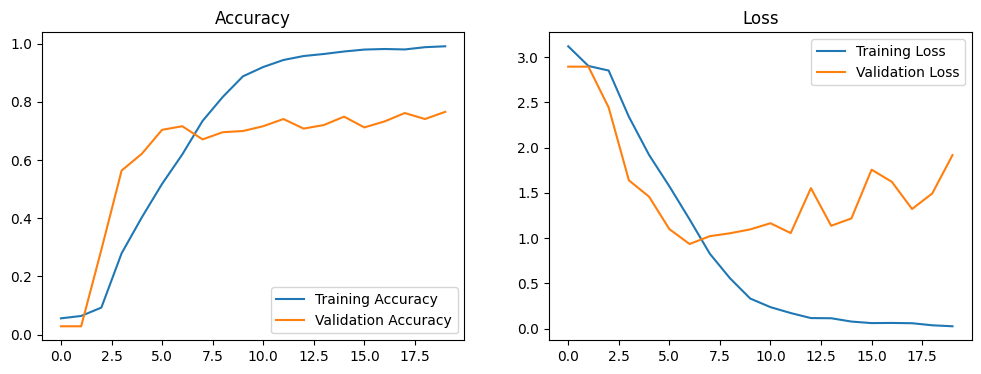

Final Training Accuracy Architecture 2: 0.9907
Final Validation Accuracy Architecture 2: 0.7654


In [163]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

print(f"Final Training Accuracy Architecture 2: {history2.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy Architecture 2: {history2.history['val_accuracy'][-1]:.4f}")

hasil pada kedua model menunjukkan tidak ada kenaikan signifikan pada validasi. hal ini menunjukkan adanya **overfit**. tebakan awal dikarenakan adanya augmentasi oleh pemilik dataset. khususnya pada bagian rotasi dan flip, hal ini cukup krusial untuk data seperti aksara, abjad dll

### Checking Image

In [158]:
def show_images_by_category(df, category_name, image_base_dir, max_display=5):
    # Filter dataframe untuk kategori tertentu
    filtered_df = df[df['name'] == category_name]
    
    print(f"Jumlah gambar dengan {category_name}: {len(filtered_df)}")
    
    # Jika tidak ada gambar, berhenti
    if len(filtered_df) == 0:
        print(f"Tidak ada gambar untuk kategori {category_name}")
        return
    
    # Setup plot
    fig, axes = plt.subplots(1, min(max_display, len(filtered_df)), figsize=(15, 3))
    
    # Handle case ketika cuma 1 gambar
    if min(max_display, len(filtered_df)) == 1:
        axes = [axes]
    
    display_count = 0
    
    # Tampilkan gambar
    for i, (idx, row) in enumerate(filtered_df.head(max_display).iterrows()):
        img_name = row['file_name']
        img_path = os.path.join(image_base_dir, category_name, img_name)
        
        img = cv2.imread(img_path)
        
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            axes[i].imshow(img_rgb)
            axes[i].set_title(f"{category_name}\n{img_name}")
            axes[i].axis('off')
            
            display_count += 1
        else:
            print(f"Gagal load: {img_path}")
    
    plt.tight_layout()
    plt.show()
    
    # Tampilkan list file names
    print(f"\nFile names {category_name}:")
    for idx, row in filtered_df.head(max_display).iterrows():
        print(f"  - {row['file_name']}")
    
    return display_count


Jumlah gambar dengan BA: 129


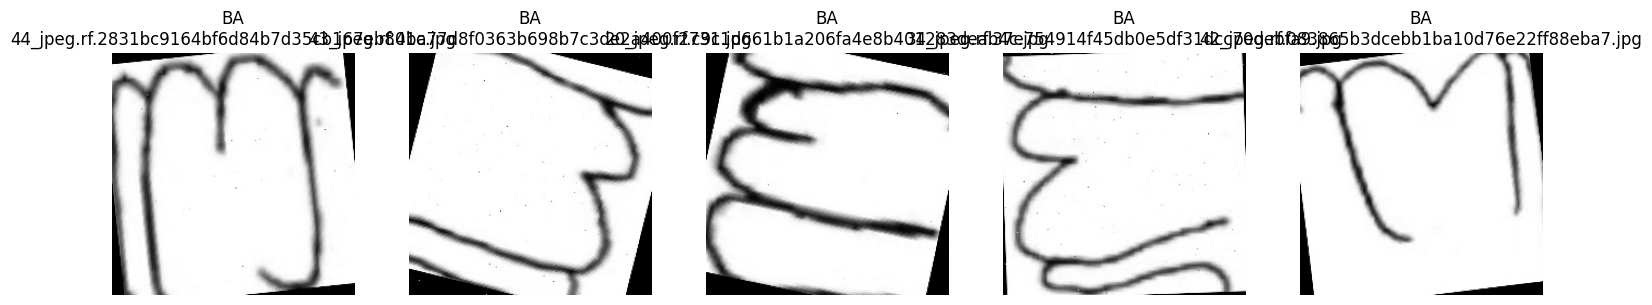


File names BA:
  - 44_jpeg.rf.2831bc9164bf6d84b7d35cb167eb801c.jpg
  - 43_jpeg.rf.4ba77d8f0363b698b7c3de2a400f2731.jpg
  - 20_jpeg.rf.c9c1d661b1a206fa4e8b401283deab4c.jpg
  - 34_jpeg.rf.37e754914f45db0e5df31dcc70debfa9.jpg
  - 42_jpeg.rf.083865b3dcebb1ba10d76e22ff88eba7.jpg


5

In [159]:
show_images_by_category(train_df, "BA", "../data/preprocessing/train", max_display=5)

Jumlah gambar dengan BA: 17


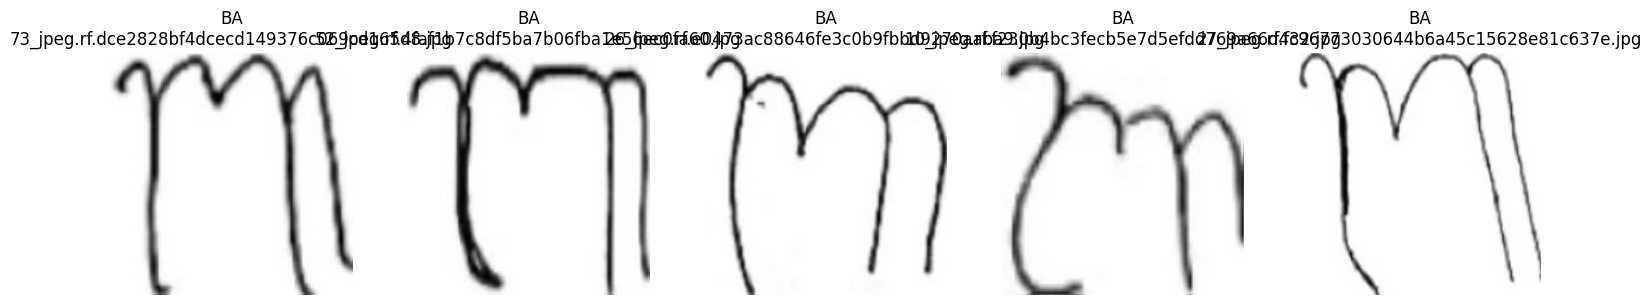


File names BA:
  - 73_jpeg.rf.dce2828bf4dcecd149376c069cd165d8.jpg
  - 52_jpeg.rf.4faf1b7c8df5ba7b06fba1e56ec0fa60.jpg
  - 26_jpeg.rf.e0473ac88646fe3c0b9fbbd9270aaba9.jpg
  - 10_jpeg.rf.f230b4bc3fecb5e7d5efdd769a66d432.jpg
  - 27_jpeg.rf.fc96773030644b6a45c15628e81c637e.jpg


5

In [162]:
show_images_by_category(val_df, "BA", "../data/preprocessing/valid", max_display=5)

terbukti pada kelima gambar di atas, untuk 1 kategori aksara, terdapat beberapa hasil object, hal ini disebabkan oleh augmentasi yang dilakukan pada folder train. kesalahan krusial terjadi saat melakukan augmentasi berupa penggunaan flip dan rotasi yang berlebihan, sehingga menyebabkan kategori-kategori aksara bisa saja berubah menjadi mirip satu sama lain. sebagai contoh misal huruf b, d, dan p yang jika dilakukan augmentasi flip dll dapat membuat ketiga huruf tersebut sama. 

### Predict Model

##### Predict Single Image

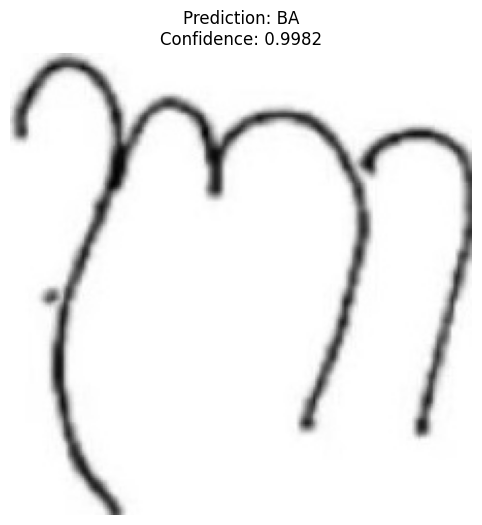

Predicted: BA
Confidence: 0.9982
Image: 54_jpeg.rf.bb05035cd49b49d1d10c4ba99b72ecad.jpg

Top 3 Predictions:
   1. BA: 0.9982
   2. NYA: 0.0018
   3. HA: 0.0000


('BA', np.float32(0.99821633))

In [164]:
def predict_single_image(model, image_path, class_indices, target_size=(224, 224)):
    """Predict single image dan tampilkan hasil"""
    
    # Load dan preprocess image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    # Prediction
    predictions = model.predict(img_array, verbose=0)
    predicted_class_idx = np.argmax(predictions[0])
    confidence = np.max(predictions[0])
    
    # Get class name
    class_names = list(class_indices.keys())
    predicted_name = class_names[predicted_class_idx]
    
    # Tampilkan hasil
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_name}\nConfidence: {confidence:.4f}")
    plt.axis('off')
    plt.show()
    
    print(f"Predicted: {predicted_name}")
    print(f"Confidence: {confidence:.4f}")
    print(f"Image: {os.path.basename(image_path)}")
    
    # Tampilkan top 3 predictions
    top_3_idx = np.argsort(predictions[0])[-3:][::-1]
    print("\nTop 3 Predictions:")
    for i, idx in enumerate(top_3_idx):
        print(f"   {i+1}. {class_names[idx]}: {predictions[0][idx]:.4f}")
    
    return predicted_name, confidence

# Usage
class_indices = train_generator.class_indices  # Dari training generator
image_path = "../data/preprocessing/test/BA/54_jpeg.rf.bb05035cd49b49d1d10c4ba99b72ecad.jpg"  # Ganti dengan path image
predict_single_image(model2, image_path, class_indices)

##### Predict Based on Test Image

In [165]:
def evaluate_test_folder(model, test_df, images_base_dir, class_indices):
    """Evaluate semua image di test folder berdasarkan test_df"""

    correct = 0
    total = len(test_df)
    results = []
    
    print(f"Testing {total} images...")
    
    for idx, row in test_df.iterrows():
        # Build image path
        img_name = row['file_name']
        true_label = row['name']
        img_path = os.path.join(images_base_dir, true_label, img_name)
        
        # Skip jika file tidak ada
        if not os.path.exists(img_path):
            print(f"File not found: {img_path}")
            continue
        
        # Load dan predict
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0
        
        predictions = model.predict(img_array, verbose=0)
        predicted_idx = np.argmax(predictions[0])
        confidence = np.max(predictions[0])
        
        # Get predicted class name
        class_names = list(class_indices.keys())
        predicted_label = class_names[predicted_idx]
        
        # Check if correct
        is_correct = (predicted_label == true_label)
        if is_correct:
            correct += 1
        
        results.append({
            'file_name': img_name,
            'true_category': true_label,
            'predicted_category': predicted_label,
            'confidence': confidence,
            'is_correct': is_correct,
            'prediction_score': predictions[0][predicted_idx]  # confidence score
        })
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    # Calculate accuracy
    accuracy = correct / total * 100
    
    print(f"\nTEST RESULTS:")
    print(f"Correct: {correct}/{total}")
    print(f"Accuracy: {accuracy:.2f}%")
    
    # Show some wrong predictions
    wrong_predictions = results_df[~results_df['is_correct']]
    if len(wrong_predictions) > 0:
        print(f"\nWrong Predictions (showing first 5):")
        for i, (idx, row) in enumerate(wrong_predictions.head(5).iterrows()):
            print(f"   {i+1}. {row['file_name']}")
            print(f"      True: {row['true_category']}, Predicted: {row['predicted_category']} (Conf: {row['confidence']:.3f})")
    
    return results_df, accuracy

In [166]:
# Run evaluation
test_images_dir = "../data/preprocessing/test"  # Folder test
results_df, accuracy = evaluate_test_folder(model2, test_df, test_images_dir, class_indices)

# Tampilkan DataFrame results
print("\nRESULTS DATAFRAME:")
results_df.head(10)


Testing 119 images...

TEST RESULTS:
Correct: 87/119
Accuracy: 73.11%

Wrong Predictions (showing first 5):
   1. 29_jpeg.rf.521b2d9689198c3688da0145db56096a.jpg
      True: CA, Predicted: TA (Conf: 0.502)
   2. 12_jpeg.rf.7a1504424128b7b2e3a5a358495171e1.jpg
      True: LA, Predicted: GA (Conf: 0.925)
   3. 31_jpeg.rf.7a06af9cabfa49bec7fb9724b259b454.jpg
      True: TA, Predicted: HA (Conf: 0.945)
   4. 52_jpeg.rf.62d06746c599aaa9a28cd7595780da15.jpg
      True: SA, Predicted: NA (Conf: 0.598)
   5. 22_jpeg.rf.506ba3c7046ec7af83ba0b82c44a33ed.jpg
      True: BA, Predicted: HA (Conf: 0.961)

RESULTS DATAFRAME:


,file_name,true_category,predicted_category,confidence,is_correct,prediction_score
0,63_jpeg.rf.4752696ae03c82986748d2a11653fc1f.jpg,NGA,NGA,1.000000,True,1.000000
1,74_jpeg.rf.4c00be273e949b4258fa878d8c79fad0.jpg,LA,LA,1.000000,True,1.000000
2,68_jpeg.rf.f8a918c98c30adde9fc50d990bbfbe3b.jpg,MA,MA,0.999271,True,0.999271
3,29_jpeg.rf.521b2d9689198c3688da0145db56096a.jpg,CA,TA,0.501869,False,0.501869
4,28_jpeg.rf.f432fb947f2d28825144a62754f3ab77.jpg,PA,PA,0.999963,True,0.999963
5,12_jpeg.rf.7a1504424128b7b2e3a5a358495171e1.jpg,LA,GA,0.925139,False,0.925139
6,31_jpeg.rf.7a06af9cabfa49bec7fb9724b259b454.jpg,TA,HA,0.944706,False,0.944706
7,9_jpeg.rf.d454d9db13a19180398431412c3f54c5.jpg,HA,HA,0.999947,True,0.999947
8,52_jpeg.rf.62d06746c599aaa9a28cd7595780da15.jpg,SA,NA,0.598247,False,0.598247
9,22_jpeg.rf.506ba3c7046ec7af83ba0b82c44a33ed.jpg,BA,HA,0.961096,False,0.961096


##### Analysis the Result

In [167]:
# Analisis per kategori
print("\nACCURACY PER CATEGORY:")
category_accuracy = results_df.groupby('true_category').apply(
    lambda x: (x['is_correct'].sum() / len(x) * 100)
).round(2)

category_accuracy


ACCURACY PER CATEGORY:


C:\Users\hifri\AppData\Local\Temp\ipykernel_20292\477286198.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_accuracy = results_df.groupby('true_category').apply(


true_category
BA      62.50
CA      33.33
DA      50.00
GA     100.00
HA      75.00
JA     100.00
KA      57.14
LA      50.00
MA     100.00
NA      80.00
NGA    100.00
NYA     85.71
PA      62.50
RA     100.00
SA      85.71
TA      71.43
WA      75.00
YA     100.00
dtype: float64

terdapat beberapa kategori yang nilainya kurang dari sama dengan 50% yaitu **CA**, **DA**, dan **LA**. dan terdapat juga beberapa kategori yang sekiranya lumayan tinggi hasilnya 

In [168]:
# Prediksi dengan confidence rendah
low_confidence = results_df[results_df['confidence'] < 0.7]
print(f"\nLow Confidence Predictions (<0.7): {len(low_confidence)}")
low_confidence[['file_name', 'true_category', 'predicted_category', 'confidence']]


Low Confidence Predictions (<0.7): 11


,file_name,true_category,predicted_category,confidence
3,29_jpeg.rf.521b2d9689198c3688da0145db56096a.jpg,CA,TA,0.501869
8,52_jpeg.rf.62d06746c599aaa9a28cd7595780da15.jpg,SA,NA,0.598247
10,59_jpeg.rf.a871c851f7418c3acd3695706afc8b16.jpg,KA,NYA,0.642977
14,22_jpeg.rf.365ee423603b611e336df88953ced037.jpg,WA,CA,0.611819
34,4_jpeg.rf.e42d39c7f77d7e8eefb84d7a5f49038f.jpg,KA,DA,0.606818
44,30_jpeg.rf.1c38c2b01fb1ed275126d1e51d478d95.jpg,SA,SA,0.676545
60,74_jpeg.rf.316c9d885d940cfd6f8313f2c5686fba.jpg,HA,TA,0.615772
72,28_jpeg.rf.76fe38703480526c6cae56711597e455.jpg,NA,CA,0.508694
84,5_jpeg.rf.bf394095adb1cf6f922322e651dcf7ac.jpg,BA,BA,0.672710
92,51_jpeg.rf.f0720cd5d87399a67f868b1a146e384f.jpg,CA,WA,0.544712


In [169]:
correct_predictions = results_df[results_df['true_category'] == results_df['predicted_category']]

print(f"CORRECT PREDICTIONS: {len(correct_predictions)}/{len(results_df)}")
print("=" * 60)

# Tampilkan data
print("Correct Predictions Data:")
correct_predictions[['file_name', 'true_category', 'predicted_category', 'confidence']].head(10)
#correct_predictions[['file_name', 'true_category', 'predicted_category', 'confidence']]

CORRECT PREDICTIONS: 87/119
Correct Predictions Data:


,file_name,true_category,predicted_category,confidence
0,63_jpeg.rf.4752696ae03c82986748d2a11653fc1f.jpg,NGA,NGA,1.000000
1,74_jpeg.rf.4c00be273e949b4258fa878d8c79fad0.jpg,LA,LA,1.000000
2,68_jpeg.rf.f8a918c98c30adde9fc50d990bbfbe3b.jpg,MA,MA,0.999271
4,28_jpeg.rf.f432fb947f2d28825144a62754f3ab77.jpg,PA,PA,0.999963
7,9_jpeg.rf.d454d9db13a19180398431412c3f54c5.jpg,HA,HA,0.999947
11,1_jpeg.rf.13f91124158e9945f5054fbcca0eabb7.jpg,SA,SA,0.969418
12,47_jpeg.rf.ce7287bcaee7094d1103dca51240e8fd.jpg,CA,CA,0.999963
13,17_jpeg.rf.c661bf2319b59f1cee3440e5797fa424.jpg,NA,NA,1.000000
16,53_jpeg.rf.8ff1b636bea53b2d9a04a440acc6f299.jpg,PA,PA,0.999935
17,18_jpeg.rf.d59610467da000b96698875f2cca64b7.jpg,PA,PA,0.888986


In [170]:

print(f"\nConfidence Analysis for Correct Predictions:")
print(f"   Average Confidence: {correct_predictions['confidence'].mean():.3f}")
print(f"   Min Confidence: {correct_predictions['confidence'].min():.3f}")
print(f"   Max Confidence: {correct_predictions['confidence'].max():.3f}")



Confidence Analysis for Correct Predictions:
   Average Confidence: 0.972
   Min Confidence: 0.673
   Max Confidence: 1.000


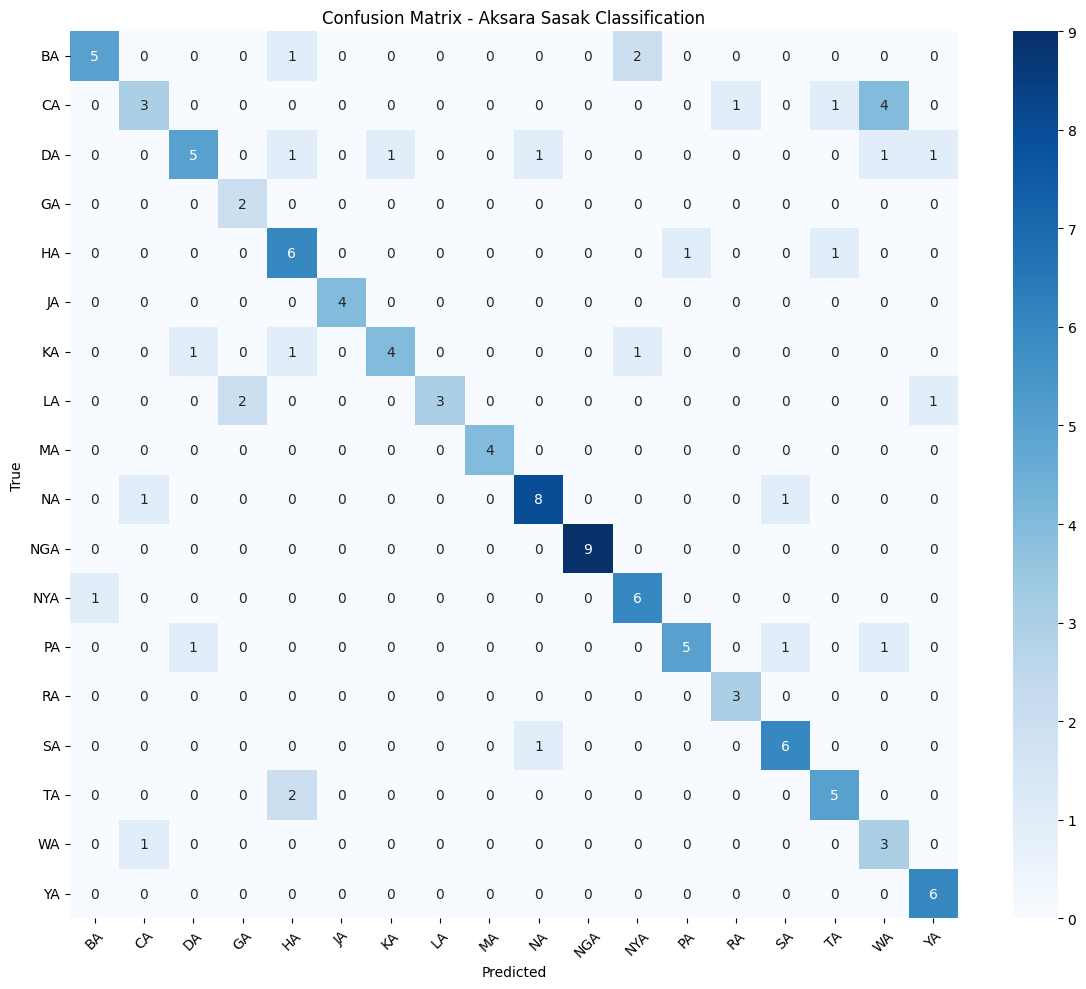

In [171]:
def plot_confusion_matrix(results_df, class_indices):
    """Plot confusion matrix dari DataFrame"""
    
    # Prepare data for confusion matrix
    y_true = results_df['true_category'].tolist()
    y_pred = results_df['predicted_category'].tolist()
    
    class_names = list(class_indices.keys())
    
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=class_names)
    
    # Plot
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix - Aksara Sasak Classification')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return cm

# Usage
cm = plot_confusion_matrix(results_df, class_indices)

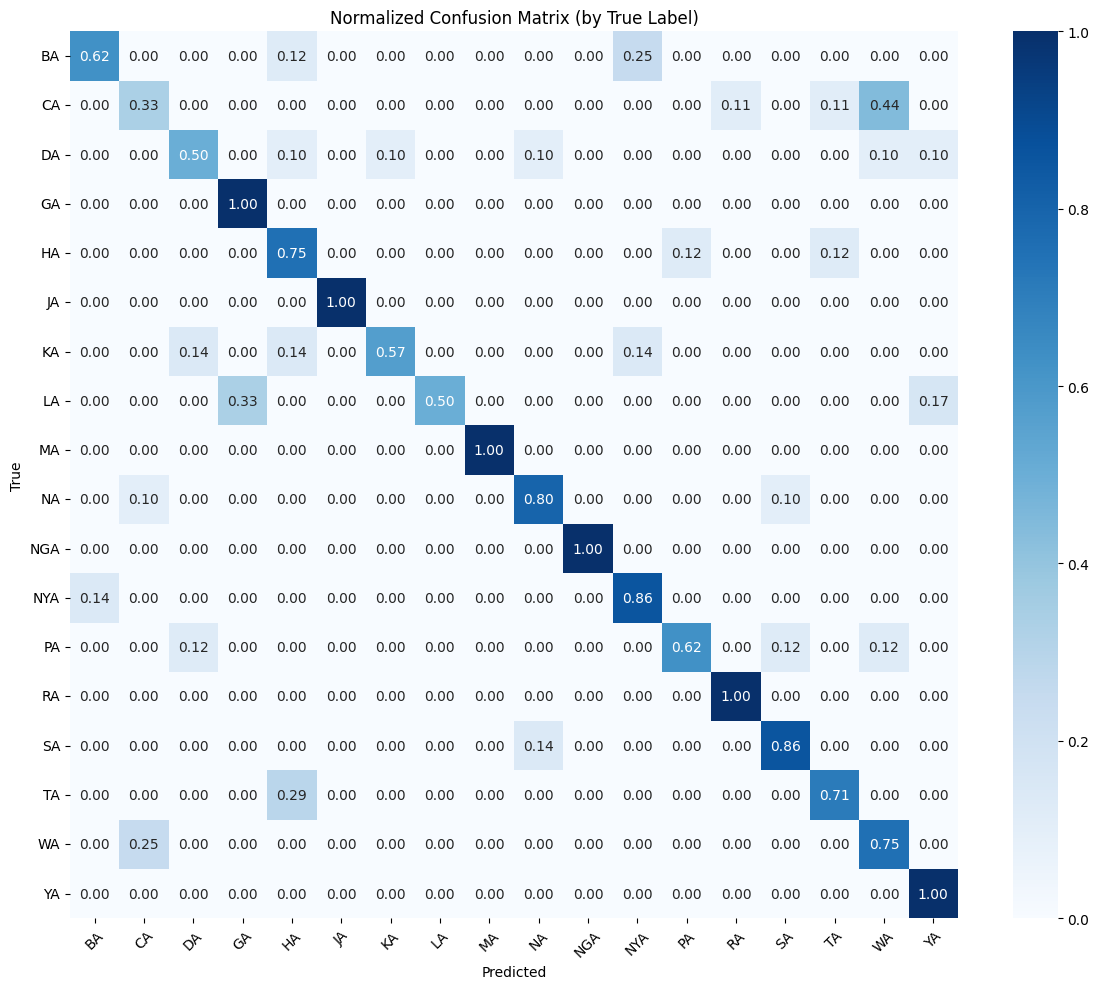

In [172]:
def plot_normalized_confusion_matrix(results_df, class_indices):
    """Plot confusion matrix yang dinormalisasi (persentase)"""
    
    # Prepare data
    y_true = results_df['true_category'].tolist()
    y_pred = results_df['predicted_category'].tolist()
    
    class_names = list(class_indices.keys())
    
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=class_names)
    
    # Normalize by row (true labels)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Plot
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                vmin=0, vmax=1)
    plt.title('Normalized Confusion Matrix (by True Label)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return cm_normalized

# Usage
cm_normalized = plot_normalized_confusion_matrix(results_df, class_indices)

In [173]:
def analyze_confusion_matrix(cm, class_names):
    """Analisis confusion matrix untuk insight"""
    
    print("CONFUSION MATRIX ANALYSIS:")
    print("=" * 50)
    
    # Most confused pairs
    most_confused = []
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            if i != j and cm[i, j] > 0:  # Hanya prediksi salah
                most_confused.append((class_names[i], class_names[j], cm[i, j]))
    
    # Sort by confusion count
    most_confused.sort(key=lambda x: x[2], reverse=True)
    
    print("MOST CONFUSED PAIRS:")
    for true, pred, count in most_confused[:5]:  # Top 5
        print(f"   {true} → {pred}: {count} samples")
    
    # Per-class accuracy dari confusion matrix
    print(f"\nPER-CLASS ACCURACY FROM CONFUSION MATRIX:")
    for i, class_name in enumerate(class_names):
        correct = cm[i, i]
        total = cm[i, :].sum()
        accuracy = correct / total * 100 if total > 0 else 0
        print(f"   {class_name}: {correct}/{total} ({accuracy:.1f}%)")

# Usage
class_names = list(class_indices.keys())
analyze_confusion_matrix(cm, class_names)

CONFUSION MATRIX ANALYSIS:
MOST CONFUSED PAIRS:
   CA → WA: 4 samples
   BA → NYA: 2 samples
   LA → GA: 2 samples
   TA → HA: 2 samples
   BA → HA: 1 samples

PER-CLASS ACCURACY FROM CONFUSION MATRIX:
   BA: 5/8 (62.5%)
   CA: 3/9 (33.3%)
   DA: 5/10 (50.0%)
   GA: 2/2 (100.0%)
   HA: 6/8 (75.0%)
   JA: 4/4 (100.0%)
   KA: 4/7 (57.1%)
   LA: 3/6 (50.0%)
   MA: 4/4 (100.0%)
   NA: 8/10 (80.0%)
   NGA: 9/9 (100.0%)
   NYA: 6/7 (85.7%)
   PA: 5/8 (62.5%)
   RA: 3/3 (100.0%)
   SA: 6/7 (85.7%)
   TA: 5/7 (71.4%)
   WA: 3/4 (75.0%)
   YA: 6/6 (100.0%)
